In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Proxy VAR

$$Y_t = c + \sum_{j=1}^p {B_jY_{t-j}} + DX_t +A_0ε_t$$

*Yt是内生变量的向量，包括人民银行的各种政策工具*


*Xt是国际外生变量的向量。*

简化形式（reduced-form）的VAR残差$u_t$是结构冲击的线性组合，$u_t =A_0ε_t$，因此简化形式的残差$E [u_tu_t']$的方差-协方差矩阵为$Ω= A_0A_0'$。

我们的目标是确定$A_0$对货币政策冲击的同时效应（contemporaneous effect）做出反应。

 我们的方法需要我们的指标进行验证：
$$
E（Z_t，ε_p^t）=α \not= 0
$$

$$
E（Z_t，ε_q^t）= 0
$$



In [3]:
from statsmodels.tsa.api import VAR
# help(VAR)

a='''
class VAR(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  VAR(endog, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Fit VAR(p) process and do lag order selection
 |  
 |  .. math:: y_t = A_1 y_{t-1} + \ldots + A_p y_{t-p} + u_t
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      2-d endogenous response variable. The independent variable.
 |  exog : array_like
 |      2-d exogenous variable.
 |  dates : array_like
 |      must match number of rows of endog
 '''

$y_t = A_1 y_{t-1} + \ldots + A_p y_{t-p} + u_t$  

# 读取数据

In [4]:
# 复制一遍上面的数据免得修改了
df=pd.read_pickle('df_new.pkl')
df

,公布时间,生效时间,调整前,调整后,调整幅度,调整前.1,调整后.1,调整幅度.1
公布时间,,,,,,,,
2010-05-02,2010年05月02日,2010年05月10日,16.5,17.0,0.5,14.5,15.0,0.5
2010-11-10,2010年11月10日,2010年11月16日,17.0,17.5,0.5,15.0,15.5,0.5
2010-11-19,2010年11月19日,2010年11月29日,17.5,18.0,0.5,15.5,16.0,0.5
2010-12-10,2010年12月10日,2010年12月20日,18.0,18.5,0.5,16.0,16.5,0.5
2011-01-14,2011年01月14日,2011年01月20日,18.5,19.0,0.5,16.5,16.5,0.0
2011-02-18,2011年02月18日,2011年02月24日,19.0,19.5,0.5,16.5,17.0,0.5
2011-03-18,2011年03月18日,2011年03月25日,19.5,20.0,0.5,17.0,18.0,1.0
2011-04-17,2011年04月17日,2011年04月21日,20.0,20.5,0.5,18.0,18.5,0.5
2011-05-12,2011年05月12日,2011年05月18日,20.5,21.0,0.5,18.5,19.0,0.5


In [5]:
# cpi=pd.read_excel('VAR.xlsx',sheet_name='Sheet1',index_col=0)


In [6]:
cpi=pd.read_excel('VAR用的月度数据.xls',index_col=0)

cpi=cpi['2010-06':'2020-06']#.iloc[:,[0,1,3,4,6]]
cpi.index=list(map(lambda x:str(x)[:7],cpi.index.tolist()))
# cpi=cpi.iloc[:,:-4]
cpi

,CPI,PPI,Ind_add_value,VIX,commodity,M2,Lending,r007
2010-06,1.6,6.41,13.700000,29.916364,0.127172,18.46,5.31,3.76
2010-07,1.6,4.84,13.400000,25.565238,0.121995,17.60,5.31,3.76
2010-08,1.5,4.32,13.900000,24.745909,0.104479,19.20,5.31,3.76
2010-09,1.4,4.33,13.300000,22.517619,0.130505,18.96,5.31,3.76
2010-10,1.6,5.04,13.100000,20.373333,0.172961,19.30,5.56,3.76
...,...,...,...,...,...,...,...,...
2020-02,0.9,-0.40,-25.867052,19.628947,0.075363,8.80,4.35,2.40
2020-03,0.7,-1.50,-1.100000,57.736818,-0.077075,10.10,4.35,2.20
2020-04,0.4,-3.10,3.900000,41.453810,-0.196434,11.10,4.35,2.20
2020-05,0.4,-3.70,4.400000,30.897000,-0.148183,11.10,4.35,2.20


In [7]:
# cpi2=pd.read_excel('ceic数据.xlsx',sheet_name='Sheet1',index_col=0)
# cpi2=cpi2['2010-06':'2020-06'].iloc[:,[0,1,3,4,6]]
# cpi2.index=list(map(lambda x:str(x)[:7],cpi2.index.tolist()))
# # cpi=cpi.iloc[:,:-4]
# cpi2

In [8]:
# cpi['industry_yoy'].fillna(method='ffill',inplace=True)

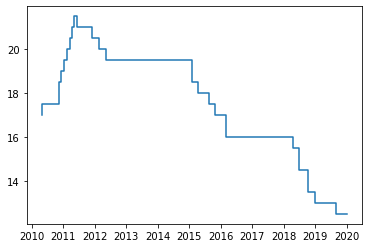

In [9]:
plt.step(df.index,df['调整后'])

In [10]:
cpi

,CPI,PPI,Ind_add_value,VIX,commodity,M2,Lending,r007
2010-06,1.6,6.41,13.700000,29.916364,0.127172,18.46,5.31,3.76
2010-07,1.6,4.84,13.400000,25.565238,0.121995,17.60,5.31,3.76
2010-08,1.5,4.32,13.900000,24.745909,0.104479,19.20,5.31,3.76
2010-09,1.4,4.33,13.300000,22.517619,0.130505,18.96,5.31,3.76
2010-10,1.6,5.04,13.100000,20.373333,0.172961,19.30,5.56,3.76
...,...,...,...,...,...,...,...,...
2020-02,0.9,-0.40,-25.867052,19.628947,0.075363,8.80,4.35,2.40
2020-03,0.7,-1.50,-1.100000,57.736818,-0.077075,10.10,4.35,2.20
2020-04,0.4,-3.10,3.900000,41.453810,-0.196434,11.10,4.35,2.20
2020-05,0.4,-3.70,4.400000,30.897000,-0.148183,11.10,4.35,2.20


In [11]:
now_rrr={}
for month in cpi.index:
    try:
        # 计算每月收盘rrr
        now_rrr[month]=df[df.index<month].iloc[-1]['调整后']
    except:
        now_rrr[month]=None
cpi['rrr']=now_rrr.values()
cpi.dropna(axis=0,inplace=True)
cpi

,CPI,PPI,Ind_add_value,VIX,commodity,M2,Lending,r007,rrr
2010-06,1.6,6.41,13.700000,29.916364,0.127172,18.46,5.31,3.76,17.0
2010-07,1.6,4.84,13.400000,25.565238,0.121995,17.60,5.31,3.76,17.0
2010-08,1.5,4.32,13.900000,24.745909,0.104479,19.20,5.31,3.76,17.0
2010-09,1.4,4.33,13.300000,22.517619,0.130505,18.96,5.31,3.76,17.0
2010-10,1.6,5.04,13.100000,20.373333,0.172961,19.30,5.56,3.76,17.0
...,...,...,...,...,...,...,...,...,...
2020-02,0.9,-0.40,-25.867052,19.628947,0.075363,8.80,4.35,2.40,12.5
2020-03,0.7,-1.50,-1.100000,57.736818,-0.077075,10.10,4.35,2.20,12.5
2020-04,0.4,-3.10,3.900000,41.453810,-0.196434,11.10,4.35,2.20,12.5
2020-05,0.4,-3.70,4.400000,30.897000,-0.148183,11.10,4.35,2.20,12.5


In [12]:
irs=pd.read_excel('IRS_ALL.xlsx',index_col=0)
irs.index=pd.DatetimeIndex(irs.index)
irs

,收盘价
日期,
2010-04-19,2.1900
2010-04-20,2.1600
2010-04-21,2.1500
2010-04-22,2.1300
2010-04-23,2.1300
...,...
2020-09-24,2.4275
2020-09-25,2.4625
2020-09-28,2.4400


In [13]:
# 加入irs月变化
irs_month={}
for month in cpi.index:
    try:
        irs_month[month]=round((irs[month].iloc[-1]-irs[month].iloc[0]).values[0],4)
    except:
        irs_month[month]=None
irs_month
cpi['irs_month']=irs_month.values()
cpi.dropna(axis=0,inplace=True)
cpi

,CPI,PPI,Ind_add_value,VIX,commodity,M2,Lending,r007,rrr,irs_month
2010-06,1.6,6.41,13.700000,29.916364,0.127172,18.46,5.31,3.76,17.0,0.0300
2010-07,1.6,4.84,13.400000,25.565238,0.121995,17.60,5.31,3.76,17.0,-0.1600
2010-08,1.5,4.32,13.900000,24.745909,0.104479,19.20,5.31,3.76,17.0,-0.0600
2010-09,1.4,4.33,13.300000,22.517619,0.130505,18.96,5.31,3.76,17.0,0.1550
2010-10,1.6,5.04,13.100000,20.373333,0.172961,19.30,5.56,3.76,17.0,-0.3357
...,...,...,...,...,...,...,...,...,...,...
2020-02,0.9,-0.40,-25.867052,19.628947,0.075363,8.80,4.35,2.40,12.5,-0.1775
2020-03,0.7,-1.50,-1.100000,57.736818,-0.077075,10.10,4.35,2.20,12.5,-0.3800
2020-04,0.4,-3.10,3.900000,41.453810,-0.196434,11.10,4.35,2.20,12.5,-0.4425
2020-05,0.4,-3.70,4.400000,30.897000,-0.148183,11.10,4.35,2.20,12.5,0.2400


In [14]:
#美债一年期
us_bond=pd.read_excel('美债收益率.xlsx',index_col=0).iloc[3:-6]
us_bond.index=pd.DatetimeIndex(us_bond.index)
us_bond.sort_index(inplace=True)
us_bond=us_bond['2010':'2020-06']['美国国债收益率曲线:1年']
# us_bond.plot()

In [15]:
# 美债收益率，可以简化
us_month={}
for month in cpi.index:
    try:
        us_month[month]=us_bond[month].iloc[-1]
    except:
        us_month[month]=None
us_month
cpi['us_month']=us_month.values()
cpi.dropna(axis=0,inplace=True)
cpi

,CPI,PPI,Ind_add_value,VIX,commodity,M2,Lending,r007,rrr,irs_month,us_month
2010-06,1.6,6.41,13.700000,29.916364,0.127172,18.46,5.31,3.76,17.0,0.0300,0.32
2010-07,1.6,4.84,13.400000,25.565238,0.121995,17.60,5.31,3.76,17.0,-0.1600,0.29
2010-08,1.5,4.32,13.900000,24.745909,0.104479,19.20,5.31,3.76,17.0,-0.0600,0.25
2010-09,1.4,4.33,13.300000,22.517619,0.130505,18.96,5.31,3.76,17.0,0.1550,0.27
2010-10,1.6,5.04,13.100000,20.373333,0.172961,19.30,5.56,3.76,17.0,-0.3357,0.22
...,...,...,...,...,...,...,...,...,...,...,...
2020-02,0.9,-0.40,-25.867052,19.628947,0.075363,8.80,4.35,2.40,12.5,-0.1775,0.97
2020-03,0.7,-1.50,-1.100000,57.736818,-0.077075,10.10,4.35,2.20,12.5,-0.3800,0.17
2020-04,0.4,-3.10,3.900000,41.453810,-0.196434,11.10,4.35,2.20,12.5,-0.4425,0.16
2020-05,0.4,-3.70,4.400000,30.897000,-0.148183,11.10,4.35,2.20,12.5,0.2400,0.17


# 先不差分

In [16]:
endog=['rrr','CPI','Ind_add_value','M2','Lending','r007']
exog=['us_month','VIX','commodity']

model=VAR(cpi.loc[:,endog],exog=cpi.loc[:,exog])
results=model.fit(4)
lag_order = results.k_ar
print(lag_order)
# results.forecast(cpi.loc[:,endog].values[-lag_order:], 5 ,exog_future=np.zeros(5)) # 此处需要加入外生变量值

4


C:\Users\zikep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


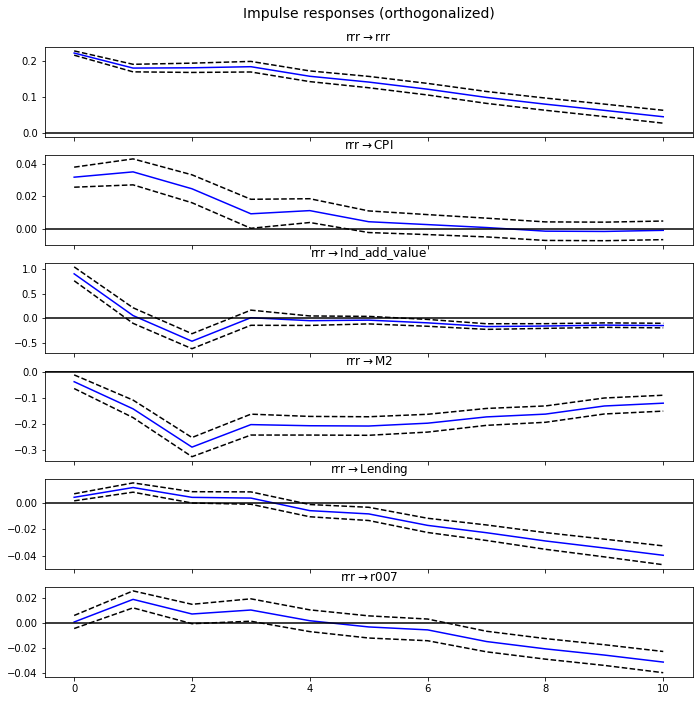

In [17]:
irf = results.irf(10)
irf.plot(orth=True,signif =0.68,impulse='rrr'); # 0.68的显著性水平


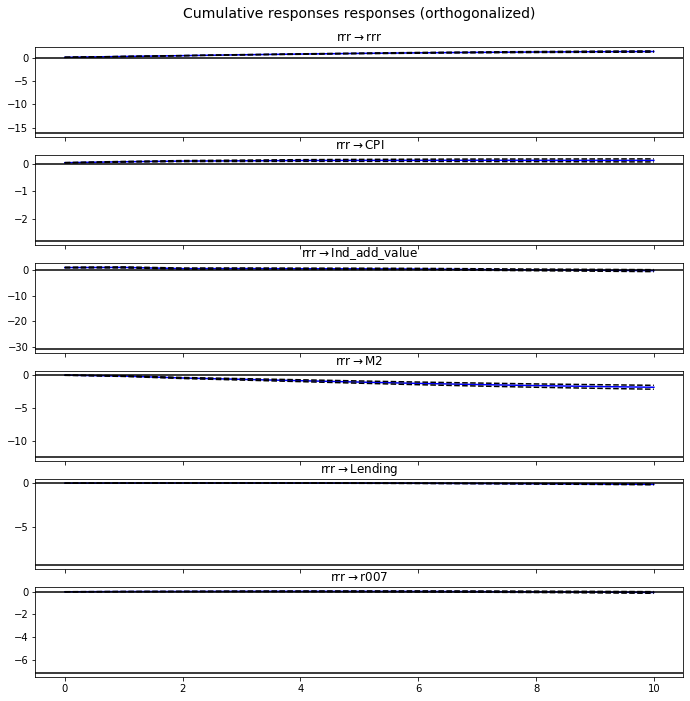

In [18]:
irf.plot_cum_effects(orth=True,signif =0.68,impulse='rrr'); # 0.68的显著性水平


In [19]:
"""
class VAR(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  VAR(endog, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Fit VAR(p) process and do lag order selection
 |  
 |  .. math:: y_t = A_1 y_{t-1} + \ldots + A_p y_{t-p} + u_t
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      2-d endogenous response variable. The independent variable.
 |  exog : array_like
 |      2-d exogenous variable.
 |  dates : array_like
 |      must match number of rows of endog
 """;

In [20]:
cpi

,CPI,PPI,Ind_add_value,VIX,commodity,M2,Lending,r007,rrr,irs_month,us_month
2010-06,1.6,6.41,13.700000,29.916364,0.127172,18.46,5.31,3.76,17.0,0.0300,0.32
2010-07,1.6,4.84,13.400000,25.565238,0.121995,17.60,5.31,3.76,17.0,-0.1600,0.29
2010-08,1.5,4.32,13.900000,24.745909,0.104479,19.20,5.31,3.76,17.0,-0.0600,0.25
2010-09,1.4,4.33,13.300000,22.517619,0.130505,18.96,5.31,3.76,17.0,0.1550,0.27
2010-10,1.6,5.04,13.100000,20.373333,0.172961,19.30,5.56,3.76,17.0,-0.3357,0.22
...,...,...,...,...,...,...,...,...,...,...,...
2020-02,0.9,-0.40,-25.867052,19.628947,0.075363,8.80,4.35,2.40,12.5,-0.1775,0.97
2020-03,0.7,-1.50,-1.100000,57.736818,-0.077075,10.10,4.35,2.20,12.5,-0.3800,0.17
2020-04,0.4,-3.10,3.900000,41.453810,-0.196434,11.10,4.35,2.20,12.5,-0.4425,0.16
2020-05,0.4,-3.70,4.400000,30.897000,-0.148183,11.10,4.35,2.20,12.5,0.2400,0.17


# ADF检验&差分

In [21]:
from statsmodels.tsa.stattools import adfuller

for one in cpi.columns:
    if one[:2]=='d_':
        continue
    p_value=(adfuller(cpi[one])[1])
    print(one,round(p_value,6))

    if p_value>0.1:
        cpi['d_'+one]=cpi[one]-cpi[one].shift(1)
    else:
#         print(one)
        pass
cpi=cpi.dropna()
cpi

CPI 0.700143
PPI 0.031587
Ind_add_value 0.949465
VIX 0.000349
commodity 0.066468
M2 0.320564
Lending 0.837462
r007 0.590641
rrr 0.845124
irs_month 0.000654
us_month 0.009288


,CPI,PPI,Ind_add_value,VIX,commodity,M2,Lending,r007,rrr,irs_month,us_month,d_CPI,d_Ind_add_value,d_M2,d_Lending,d_r007,d_rrr
2010-07,1.6,4.84,13.400000,25.565238,0.121995,17.60,5.31,3.76,17.0,-0.1600,0.29,0.0,-0.300000,-0.86,0.00,0.0,0.0
2010-08,1.5,4.32,13.900000,24.745909,0.104479,19.20,5.31,3.76,17.0,-0.0600,0.25,-0.1,0.500000,1.60,0.00,0.0,0.0
2010-09,1.4,4.33,13.300000,22.517619,0.130505,18.96,5.31,3.76,17.0,0.1550,0.27,-0.1,-0.600000,-0.24,0.00,0.0,0.0
2010-10,1.6,5.04,13.100000,20.373333,0.172961,19.30,5.56,3.76,17.0,-0.3357,0.22,0.2,-0.200000,0.34,0.25,0.0,0.0
2010-11,1.9,6.06,13.300000,20.095714,0.176808,19.50,5.56,3.76,17.0,0.8450,0.27,0.3,0.200000,0.20,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02,0.9,-0.40,-25.867052,19.628947,0.075363,8.80,4.35,2.40,12.5,-0.1775,0.97,-0.7,-21.553533,0.40,0.00,-0.1,-0.5
2020-03,0.7,-1.50,-1.100000,57.736818,-0.077075,10.10,4.35,2.20,12.5,-0.3800,0.17,-0.2,24.767052,1.30,0.00,-0.2,0.0
2020-04,0.4,-3.10,3.900000,41.453810,-0.196434,11.10,4.35,2.20,12.5,-0.4425,0.16,-0.3,5.000000,1.00,0.00,0.0,0.0
2020-05,0.4,-3.70,4.400000,30.897000,-0.148183,11.10,4.35,2.20,12.5,0.2400,0.17,0.0,0.500000,0.00,0.00,0.0,0.0


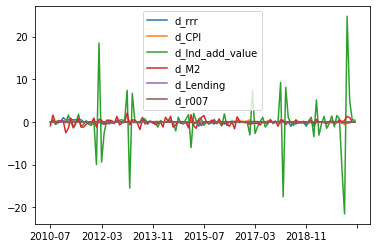

In [22]:
endog=['d_rrr','d_CPI','d_Ind_add_value','d_M2','d_Lending','d_r007']

cpi.loc[:,endog].plot()

In [60]:
ind_add=cpi['Ind_add_value']
for one in ind_add.index:
    if one[-2:]=='01' or one [-2:]=='02':
        print(ind_add[one])

13.3
14.9
2.8
21.3
17.7
2.2
8.5
8.8
9.6
3.6
5.865724
4.906937
2.93725
10.322581
15.434501
-2.119883
6.797753
3.360717
-4.313519
-25.867052


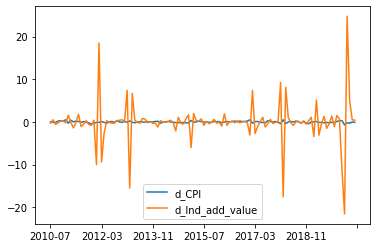

In [52]:
cpi.loc[:,['d_CPI','d_Ind_add_value']].plot()

In [24]:
endog=['d_rrr','d_CPI','d_Ind_add_value','d_M2','d_Lending','d_r007']
exog=['us_month','VIX','commodity']

model=VAR(cpi.loc[:,endog],exog=cpi.loc[:,exog])

C:\Users\zikep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [25]:
# cpi[endog+exog].to_excel('VAR用的外生内生.xlsx')
cpiii=cpi[endog+exog]
cpi[endog+exog].to_excel('VAR用的外生内生_new.xlsx')


In [26]:
cpiii.columns


Index(['d_rrr', 'd_CPI', 'd_Ind_add_value', 'd_M2', 'd_Lending', 'd_r007',
       'us_month', 'VIX', 'commodity'],
      dtype='object')

In [27]:

for one in cpiii.columns:
    p_value=(adfuller(cpiii[one])[1])
    print(p_value)


0.04644106709679825
1.455568021681679e-19
1.1929937698845681e-11
1.0309520604964625e-23
8.06125617769428e-05
2.44259238974586e-05
0.008691793873947327
0.0005500874370854395
0.11237717217672943


In [28]:
# help(adfuller)

In [29]:
from statsmodels.tsa.stattools import adfuller


In [30]:
cpi['rrr'].diff(1)

2010-07    NaN
2010-08    0.0
2010-09    0.0
2010-10    0.0
2010-11    0.0
          ... 
2020-02   -0.5
2020-03    0.0
2020-04    0.0
2020-05    0.0
2020-06    0.0
Name: rrr, Length: 120, dtype: float64

rrr需要一阶差分

In [31]:
# help(adfuller)

In [32]:
'''
 Returns
    -------
    adf : float
        The test statistic.
    pvalue : float
        MacKinnon's approximate p-value based on MacKinnon (1994, 2010).
    usedlag : int
        The number of lags used.
    nobs : int
        The number of observations used for the ADF regression and calculation
        of the critical values.
    critical values : dict
        Critical values for the test statistic at the 1 %, 5 %, and 10 %
        levels. Based on MacKinnon (2010).
    icbest : float
        The maximized information criterion if autolag is not None.
    resstore : ResultStore, optional
        A dummy class with results attached as attributes.
        '''
# 统计量，p值，滞后阶数，观测值，临界值，
# adfuller(cpi['cpi'],maxlag=2)


"\n Returns\n    -------\n    adf : float\n        The test statistic.\n    pvalue : float\n        MacKinnon's approximate p-value based on MacKinnon (1994, 2010).\n    usedlag : int\n        The number of lags used.\n    nobs : int\n        The number of observations used for the ADF regression and calculation\n        of the critical values.\n    critical values : dict\n        Critical values for the test statistic at the 1 %, 5 %, and 10 %\n        levels. Based on MacKinnon (2010).\n    icbest : float\n        The maximized information criterion if autolag is not None.\n    resstore : ResultStore, optional\n        A dummy class with results attached as attributes.\n        "

In [33]:
# adfuller(cpi['industry_yoy'])


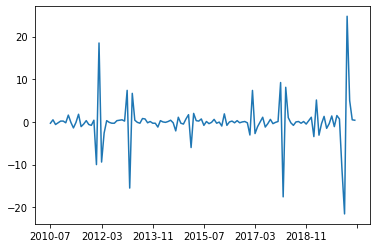

In [34]:
cpi['d_Ind_add_value'].plot()

In [35]:
# help(adfuller)

In [36]:
result=model.fit(1)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 07, Mar, 2021
Time:                     00:14:11
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -10.9930
Nobs:                     119.000    HQIC:                  -11.8252
Log likelihood:          -215.666    FPE:                4.15233e-06
AIC:                     -12.3942    Det(Omega_mle):     2.55879e-06
--------------------------------------------------------------------
Results for equation d_rrr
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.034896         0.083813            0.416           0.677
us_month                  -0.108803         0.032859           -3.311           0.001
VIX                        0.000084     

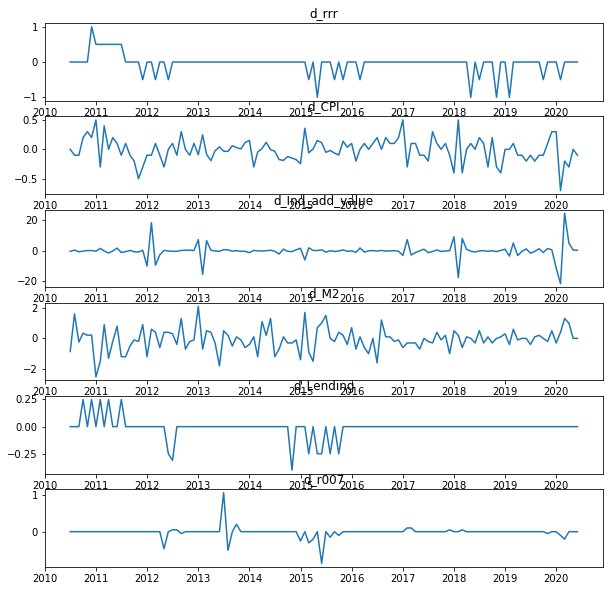

In [37]:
result.plot();

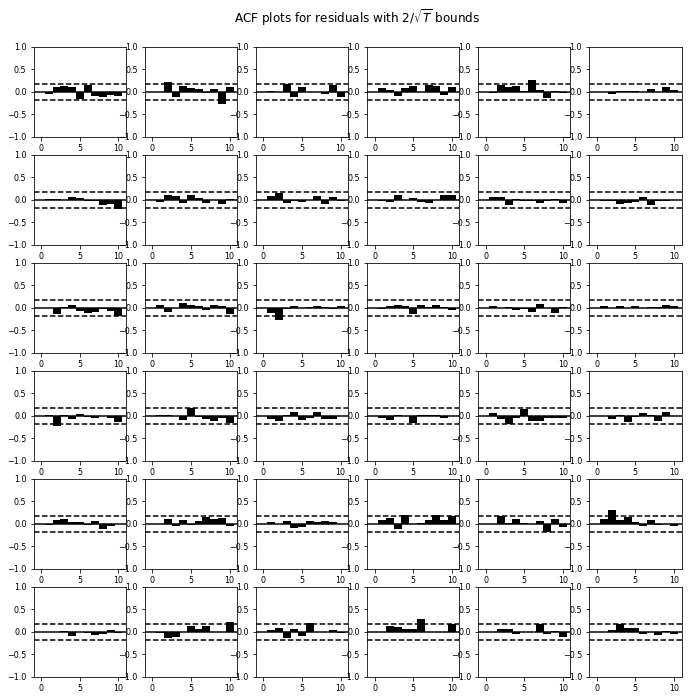

In [38]:
result.plot_acorr();

In [39]:
# help(results.forecast)

In [40]:
# help(model.fit)

In [41]:
# model.select_order(15)
results = model.fit(maxlags=15,ic='fpe')# maxlags=15, 
print(results.k_ar)
results = model.fit(maxlags=15,ic='aic')# maxlags=15, 
print(results.k_ar)
# results = model.fit(maxlags=15,ic='sc')# maxlags=15, 
# print(results.k_ar)
# results = model.fit(maxlags=15,ic='aic')# maxlags=15, 
results=model.fit(4)

1
15


In [42]:
lag_order = results.k_ar
print(lag_order)
# results.forecast(cpi.loc[:,endog].values[-lag_order:], 5 ,exog_future=np.zeros(5)) # 此处需要加入外生变量值

4


In [43]:
# results.plot_forecast(5)


Orthogonalization is done using the Cholesky decomposition of the estimated error covariance matrix Σ^u and hence interpretations may change depending on variable ordering.

In [44]:
help(results.irf().plot)

Help on method plot in module statsmodels.tsa.vector_ar.irf:

plot(orth=False, impulse=None, response=None, signif=0.05, plot_params=None, subplot_params=None, plot_stderr=True, stderr_type='asym', repl=1000, seed=None, component=None) method of statsmodels.tsa.vector_ar.irf.IRAnalysis instance
    Plot impulse responses
    
    Parameters
    ----------
    orth : bool, default False
        Compute orthogonalized impulse responses
    impulse : {str, int}
        variable providing the impulse
    response : {str, int}
        variable affected by the impulse
    signif : float (0 < signif < 1)
        Significance level for error bars, defaults to 95% CI
    subplot_params : dict
        To pass to subplot plotting funcions. Example: if fonts are too big,
        pass {'fontsize' : 8} or some number to your taste.
    plot_params : dict
    
    plot_stderr: bool, default True
        Plot standard impulse response error bands
    stderr_type: str
        'asym': default, computes 

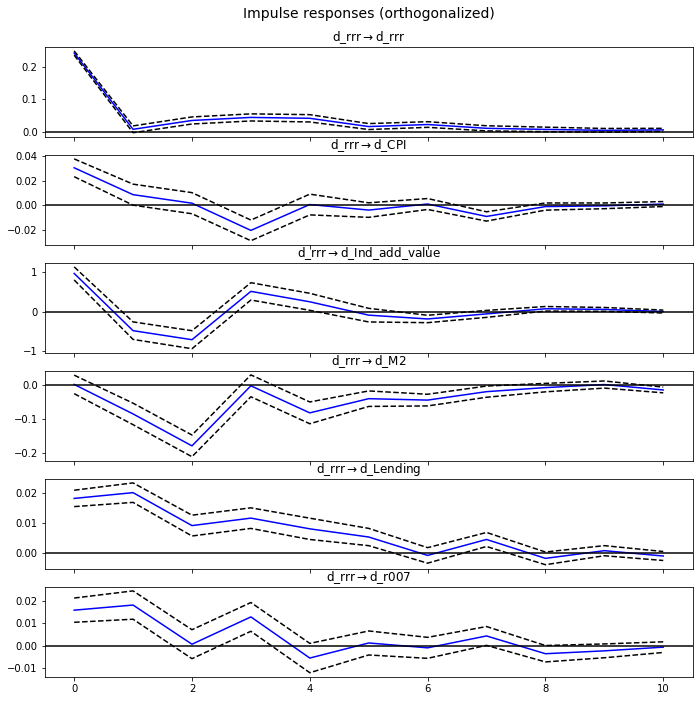

In [45]:
irf = results.irf(10)
irf.plot(orth=True,signif =0.68,impulse='d_rrr'); # 0.68的显著性水平


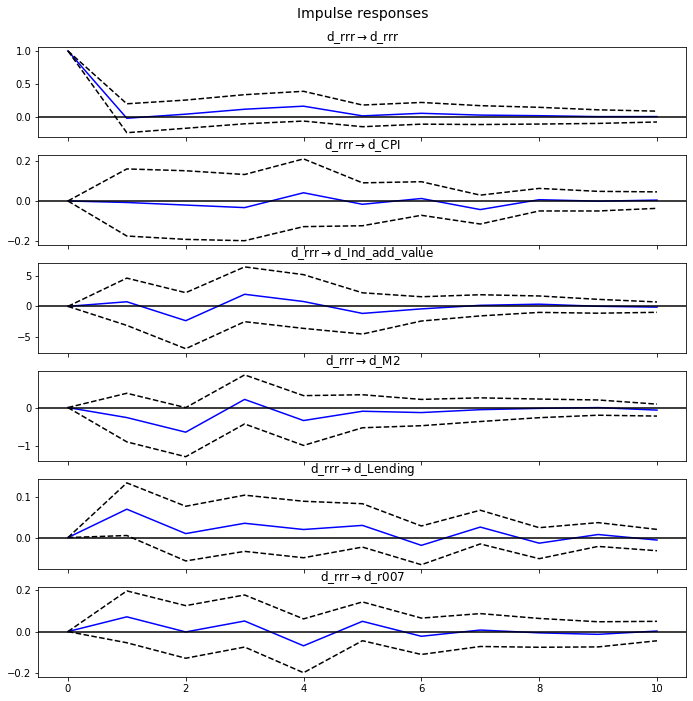

In [46]:
irf.plot(impulse='d_rrr',orth=False);

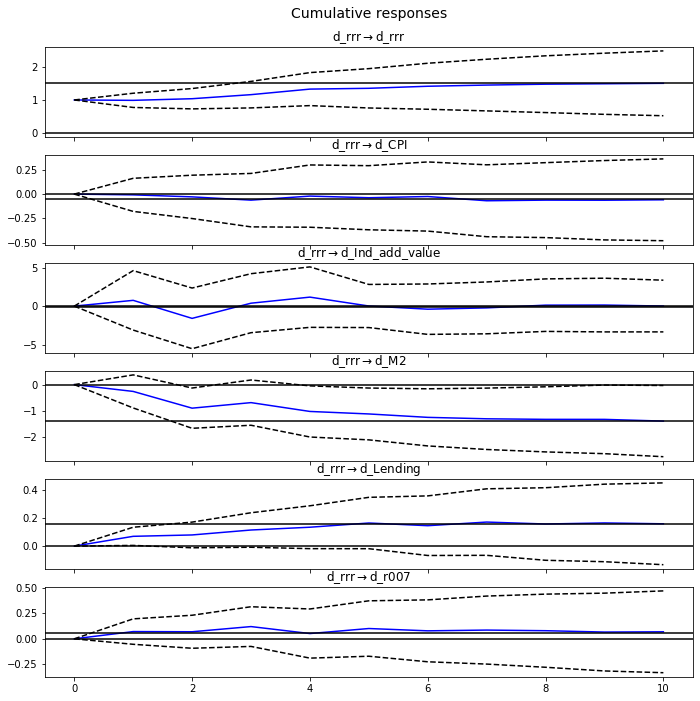

In [47]:
irf.plot_cum_effects(orth=False,impulse='d_rrr');

In [48]:
fevd = results.fevd(5)
fevd.summary()

FEVD for d_rrr
        d_rrr     d_CPI  d_Ind_add_value      d_M2  d_Lending    d_r007
0    1.000000  0.000000         0.000000  0.000000   0.000000  0.000000
1    0.958007  0.002502         0.000559  0.026191   0.012719  0.000022
2    0.839842  0.100149         0.000527  0.026485   0.031696  0.001301
3    0.816200  0.097225         0.010309  0.030663   0.043555  0.002047
4    0.767093  0.102185         0.038542  0.042784   0.047415  0.001982

FEVD for d_CPI
        d_rrr     d_CPI  d_Ind_add_value      d_M2  d_Lending    d_r007
0    0.025448  0.974552         0.000000  0.000000   0.000000  0.000000
1    0.023909  0.882062         0.035627  0.002601   0.035308  0.020494
2    0.022918  0.867687         0.034076  0.021754   0.033844  0.019721
3    0.030906  0.821246         0.046664  0.034944   0.046158  0.020083
4    0.030112  0.816115         0.046602  0.037267   0.047408  0.022496

FEVD for d_Ind_add_value
        d_rrr     d_CPI  d_Ind_add_value      d_M2  d_Lending    d_r007
0    0.

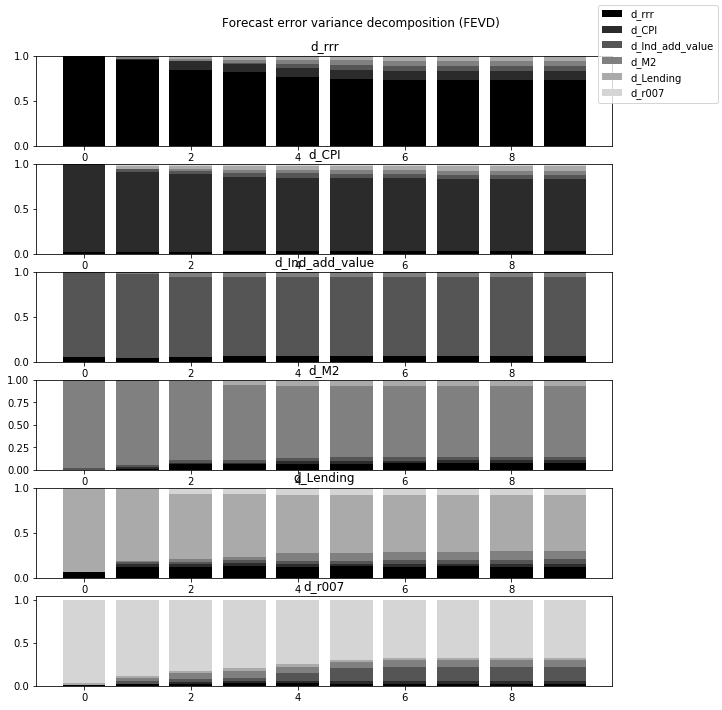

In [49]:
results.fevd(10).plot();

Granger causality

One is often interested in whether a variable or group of variables is “causal” for another variable, for some definition of “causal”. In the context of VAR models, one can say that a set of variables are Granger-causal within one of the VAR equations. We will not detail the mathematics or definition of Granger causality, but leave it to the reader. The VARResults object has the test_causality method for performing either a Wald (χ2) test or an F-test.

In [50]:
results.test_causality('d_rrr', ['d_CPI', 'd_M2'], kind='f')

In [51]:
a='\n        Test Granger causality\n\n        Parameters\n        ----------\n        caused : int or str or sequence of int or str\n            If int or str, test whether the variable specified via this index\n            (int) or name (str) is Granger-caused by the variable(s) specified\n            by `causing`.\n            If a sequence of int or str, test whether the corresponding\n            variables are Granger-caused by the variable(s) specified\n            by `causing`.\n        causing : int or str or sequence of int or str or None, default: None\n            If int or str, test whether the variable specified via this index\n            (int) or name (str) is Granger-causing the variable(s) specified by\n            `caused`.\n            If a sequence of int or str, test whether the corresponding\n            variables are Granger-causing the variable(s) specified by\n            `caused`.\n            If None, `causing` is assumed to be the complement of `caused`.\n        kind : {\'f\', \'wald\'}\n            Perform F-test or Wald (chi-sq) test\n        signif : float, default 5%\n            Significance level for computing critical values for test,\n            defaulting to standard 0.05 level\n\n        Notes\n        -----\n        Null hypothesis is that there is no Granger-causality for the indicated\n        variables. The degrees of freedom in the F-test are based on the\n        number of variables in the VAR system, that is, degrees of freedom\n        are equal to the number of equations in the VAR times degree of freedom\n        of a single equation.\n\n        Test for Granger-causality as described in chapter 7.6.3 of [1]_.\n        Test H0: "`causing` does not Granger-cause the remaining variables of\n        the system" against  H1: "`causing` is Granger-causal for the\n        remaining variables".\n\n        Returns\n        -------\n        results : CausalityTestResults\n\n        References\n        ----------\n        .. [1] Lütkepohl, H. 2005. *New Introduction to Multiple Time Series Analysis*. Springer.\n        '
print(a)


        Test Granger causality

        Parameters
        ----------
        caused : int or str or sequence of int or str
            If int or str, test whether the variable specified via this index
            (int) or name (str) is Granger-caused by the variable(s) specified
            by `causing`.
            If a sequence of int or str, test whether the corresponding
            variables are Granger-caused by the variable(s) specified
            by `causing`.
        causing : int or str or sequence of int or str or None, default: None
            If int or str, test whether the variable specified via this index
            (int) or name (str) is Granger-causing the variable(s) specified by
            `caused`.
            If a sequence of int or str, test whether the corresponding
            variables are Granger-causing the variable(s) specified by
            `caused`.
            If None, `causing` is assumed to be the complement of `caused`.
        kind : {'f', 'wal